In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [137]:
display(stud.head(10))
stud.info() 
# загрузили и посмотрели, какие данные есть. 395 строчек, много случайных пропусков

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [139]:
stud.isna().sum() #посчитаем сколько пропусков в каких столбцах

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [140]:
# выкинем строчки с пропусками в целевой переменной
stud = stud.dropna(subset=['score'], axis = 0)
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

In [141]:
# начнем со столбцов без пропусков. school

print(stud.school.nunique())
print(stud.school.value_counts())

2
GP    344
MS     45
Name: school, dtype: int64


<AxesSubplot:xlabel='school', ylabel='score'>

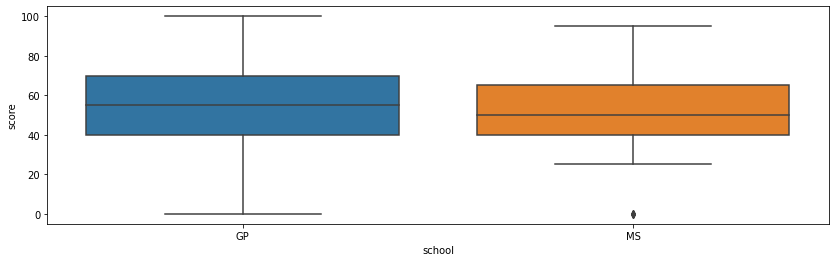

In [142]:
fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x='school', y='score', data=stud,ax=ax)

In [72]:
#похоже, во второй школе больше середнячков и нет явных отстающих. Оставляем столбец. Влияние на score слабое

2
F    204
M    185
Name: sex, dtype: int64


<AxesSubplot:xlabel='sex', ylabel='score'>

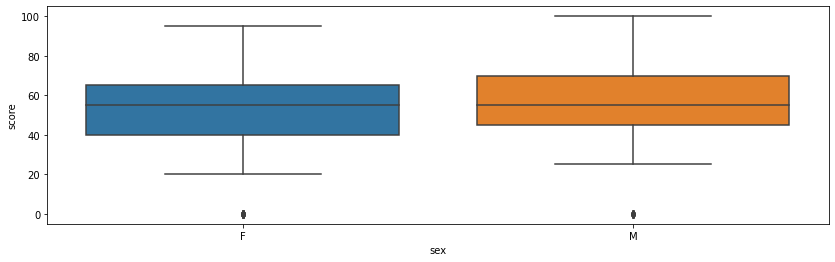

In [143]:
# следующий номинативный столбец sex
print(stud.sex.nunique())
print(stud.sex.value_counts())
fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x='sex', y='score', data=stud, ax=ax)

In [74]:
# явно видно, что пол не сильно, но влияет на оценки. Оставляем.

<AxesSubplot:>

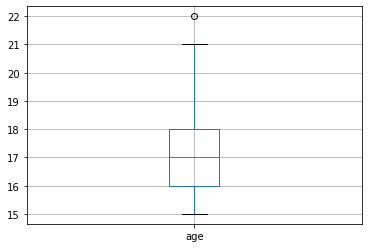

In [144]:
# следующий столбец без пропусков - числовой. Age.
stud.boxplot(column='age')

<AxesSubplot:xlabel='age', ylabel='score'>

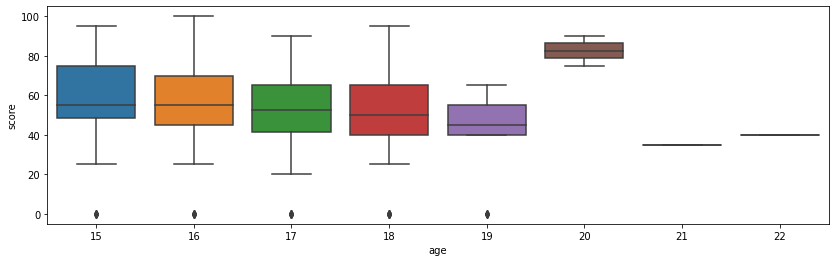

In [232]:
# явный выброс в 22 года. Пока оставим. Может второгодники. Выбросить такие результаты можно позже на этапе модели
fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x='age', y='score', data=stud, ax=ax)

<AxesSubplot:>

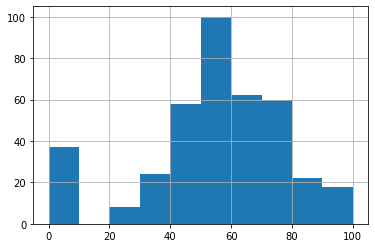

In [145]:
#посмотрим на распределение целевого параметра
stud.score.hist()

In [146]:
# 37 учеников получили 0. Оствим эти строчки пока, может это неявка и валидный результат
stud.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [79]:
# проанализируем числовые столбцы с пропусками на выбросы

<AxesSubplot:>

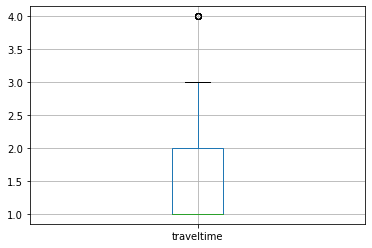

In [147]:
stud.boxplot(column='traveltime')

In [148]:
# Тоже выброс в 4.0 балла. Посмотрим сколько таких
stud.traveltime.value_counts()

1.0    239
2.0     94
3.0     21
4.0      7
Name: traveltime, dtype: int64

In [82]:
#7 учеников живут далеко. Оставляем пока

<AxesSubplot:>

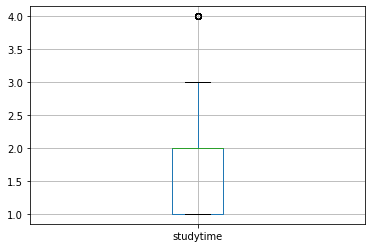

In [149]:
stud.boxplot(column='studytime')

In [84]:
# 27 учеников тратят на учёбу помимо школы в неделю более 10 часов. 

 4.0    178
 5.0     97
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

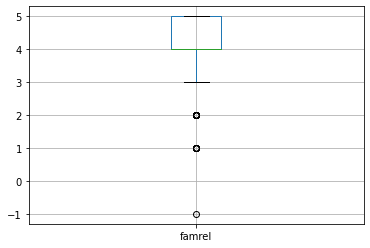

In [150]:
stud.boxplot(column='famrel')
stud.famrel.value_counts()

In [151]:
# явная ошибка -1.0. Поправим на 1.0 
stud.loc[stud.famrel == -1.0, 'famrel'] = 1.0
stud.famrel.value_counts()

4.0    178
5.0     97
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

In [87]:
# с плохими отношениями в семье тоже много учеников. Оставляем данные

3.0    152
4.0    110
2.0     63
5.0     37
1.0     18
Name: freetime, dtype: int64

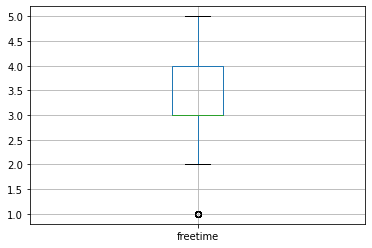

In [152]:
stud.boxplot(column='freetime')
stud.freetime.value_counts()

In [89]:
# 18 учеников имеют очень мало свободно времени после школы. Оставляем

3.0    126
2.0    101
4.0     81
5.0     51
1.0     23
Name: goout, dtype: int64

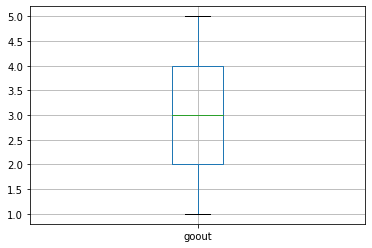

In [153]:
stud.boxplot(column='goout')
stud.goout.value_counts()

In [91]:
# данные о свободном времени с друзьями без выбросов

5.0    137
3.0     88
4.0     60
1.0     47
2.0     42
Name: health, dtype: int64

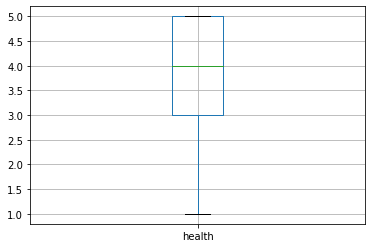

In [154]:
stud.boxplot(column='health')
stud.health.value_counts()

In [93]:
# данные о здоровье. Плсмотрим потом на корреляции.

0.0    290
1.0     48
2.0     15
3.0     14
Name: failures, dtype: int64

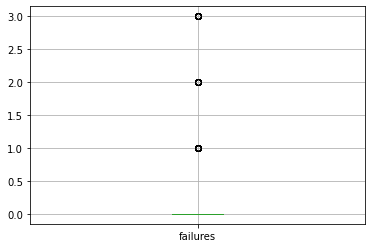

In [155]:
stud.boxplot(column='failures')
stud.failures.value_counts()

In [95]:
# косяки. основная масса без, есть 29 много и очень много. Оставим пока

0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
3.0        7
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

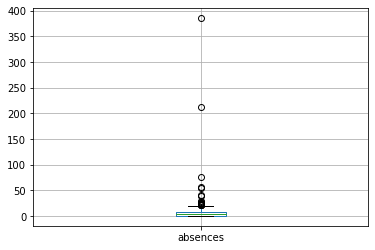

In [156]:
stud.boxplot(column='absences')
stud.absences.value_counts()

<AxesSubplot:>

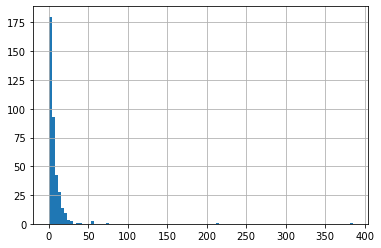

In [157]:
# Упс
stud.absences.hist(bins=100)

<AxesSubplot:title={'center':'Score Vs Пропущенные часы'}, xlabel='absences', ylabel='score'>

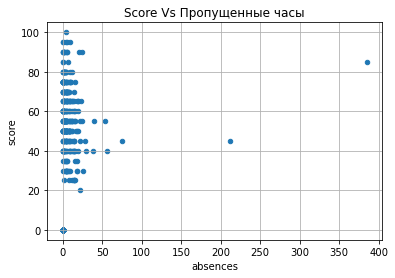

In [158]:
stud.plot(x = 'absences', 
        y = 'score', 
        kind = 'scatter', 
        grid = True, 
        title = 'Score Vs Пропущенные часы')

In [98]:
# Понятней не стало. Проанализуем по другому

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].
<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               361 non-null    object 
 1   sex                  361 non-null    object 
 2   age                  361 non-null    int64  
 3   address              347 non-null    object 
 4   famsize              339 non-null    object 
 5   Pstatus              323 non-null    object 
 6   Medu                 358 non-null    float64
 7   Fedu                 338 non-null    float64
 8   Mjob                 345 non-null    object 
 9   Fjob                 327 non-null    object 
 10  reason               344 non-null    object 
 11  guardian             331 non-null    object 
 12  traveltime           333 non-null    float64
 13  studytime            356 non-null    float64
 14  fa

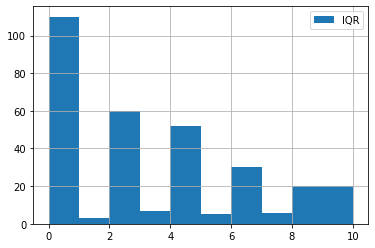

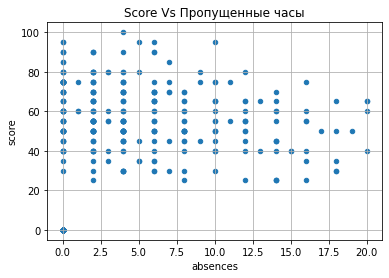

In [159]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();
stud_temp  = stud.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
stud_temp.plot(x = 'absences', 
        y = 'score', 
        kind = 'scatter', 
        grid = True, 
        title = 'Score Vs Пропущенные часы')
stud_temp.info()

<AxesSubplot:title={'center':'Score Vs Пропущенные часы'}, xlabel='absences', ylabel='score'>

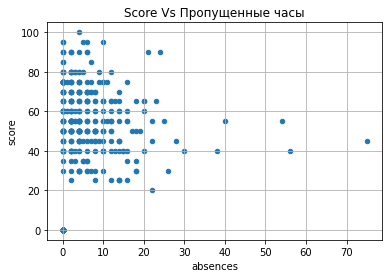

In [160]:
#выкинем выбросы с более чем 100 пропущенными часами и посмотрим на распределение 
stud_temp  = stud.loc[stud.absences < 100]
stud_temp.plot(x = 'absences', 
        y = 'score', 
        kind = 'scatter', 
        grid = True, 
        title = 'Score Vs Пропущенные часы')

<AxesSubplot:>

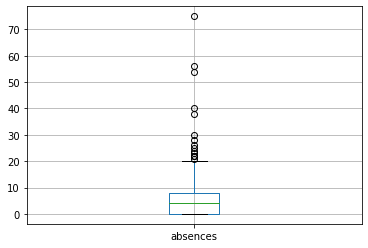

In [161]:
stud_temp.boxplot(column='absences')

In [174]:
# пока оставим все данные с менее чеим 100 часами пропусков
stud  = stud.loc[stud.absences < 100]

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.144898,-0.130154,0.074448,-0.004998,0.182715,0.004998,0.049027,0.005115,0.106328,-0.070114,0.171939,-0.149349
Medu,-0.144898,1.000000,0.267395,-0.181062,0.068568,-0.227575,-0.068568,-0.014951,0.025776,0.067270,-0.058887,0.096016,0.206289
Fedu,-0.130154,0.267395,1.000000,0.040429,0.052138,-0.143666,-0.052138,0.043830,-0.064572,-0.021715,0.024459,0.008590,0.070776
traveltime,0.074448,-0.181062,0.040429,1.000000,-0.110456,0.060897,0.110456,-0.041178,-0.019421,0.029153,0.000211,-0.014284,-0.074311
studytime,-0.004998,0.068568,0.052138,-0.110456,1.000000,-0.171588,-1.000000,0.033209,-0.128357,-0.049597,-0.082969,-0.065809,0.108754
failures,0.182715,-0.227575,-0.143666,0.060897,-0.171588,1.000000,0.171588,-0.010326,0.089420,0.091243,0.084615,0.068090,-0.325769
"studytime, granular",0.004998,-0.068568,-0.052138,0.110456,-1.000000,0.171588,1.000000,-0.033209,0.128357,0.049597,0.082969,0.065809,-0.108754
famrel,0.049027,-0.014951,0.043830,-0.041178,0.033209,-0.010326,-0.033209,1.000000,0.170989,0.076858,0.088522,-0.051829,0.059850
freetime,0.005115,0.025776,-0.064572,-0.019421,-0.128357,0.089420,0.128357,0.170989,1.000000,0.299088,0.049381,-0.068436,0.014591
goout,0.106328,0.067270,-0.021715,0.029153,-0.049597,0.091243,0.049597,0.076858,0.299088,1.000000,-0.008827,0.038435,-0.133316


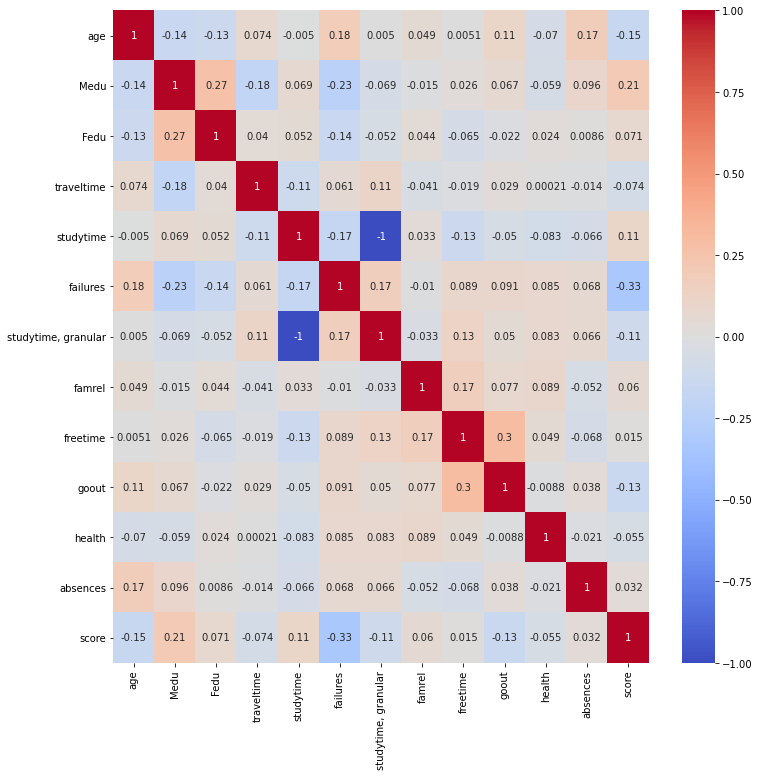

In [102]:
# посмотрим на корреляции
plt.gcf().set_size_inches(12, 12)
correlation = stud.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
display(correlation)

In [103]:
# видим корреляцию с Score Medu, Fedu, failures, goout, absences

In [163]:
# studytime и studytime, granular одинаковы с разным знаком. Выкинем studytime, granular
stud.drop(['studytime, granular'], inplace = True, axis = 1)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [165]:
stud.head(10)
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      376 non-null    object 
 1   sex         376 non-null    object 
 2   age         376 non-null    int64  
 3   address     362 non-null    object 
 4   famsize     352 non-null    object 
 5   Pstatus     333 non-null    object 
 6   Medu        373 non-null    float64
 7   Fedu        352 non-null    float64
 8   Mjob        358 non-null    object 
 9   Fjob        341 non-null    object 
 10  reason      359 non-null    object 
 11  guardian    346 non-null    object 
 12  traveltime  348 non-null    float64
 13  studytime   371 non-null    float64
 14  failures    354 non-null    float64
 15  schoolsup   367 non-null    object 
 16  famsup      339 non-null    object 
 17  paid        338 non-null    object 
 18  activities  362 non-null    object 
 19  nursery     361 non-null    o

In [209]:
# и тест Стьюдента
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))

    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Mjob', 'Medu', 'Fedu', 'Fjob', 
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 
            'reason', 'guardian', 'traveltime', 'studytime',
           'higher', 'internet', 'romantic', 
            'freetime', 'famrel', 'goout', 'health','absences']:
    get_stat_dif(col)



Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeW

KeyError: 'famsize'

In [169]:
# Столбцы sex< address, Mjob, Medu, higher, romantic, goout, absences -  кандидаты на попадание в финал

In [172]:
# создадим временный dataframe в котором заменим NaN на unknown для анализа влияния на score и заоодно посмотрим,
# чем можно заменять пропуски
stud.isna().sum()

school         0
sex            0
age            0
address       14
famsize       24
Pstatus       43
Medu           3
Fedu          24
Mjob          18
Fjob          35
reason        17
guardian      30
traveltime    28
studytime      5
failures      22
schoolsup      9
famsup        37
paid          38
activities    14
nursery       15
higher        19
internet      33
romantic      31
famrel        27
freetime       9
goout          7
health        15
absences       0
score          0
dtype: int64

In [175]:
stud_temp = stud.where(pd.notnull(stud), 'unknown')

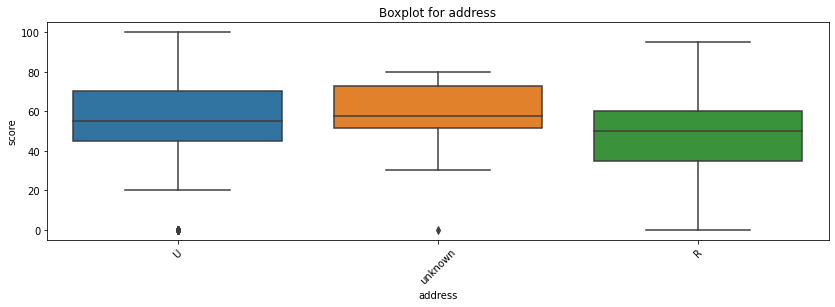

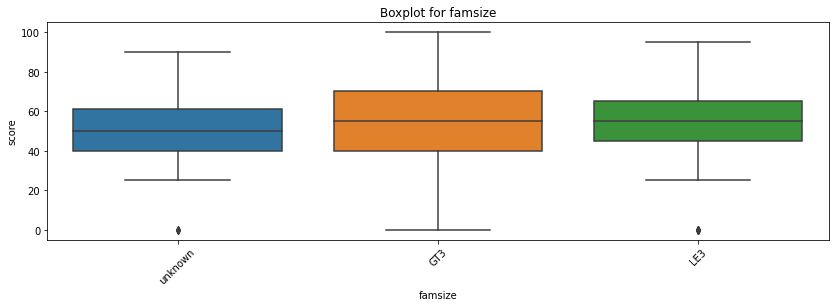

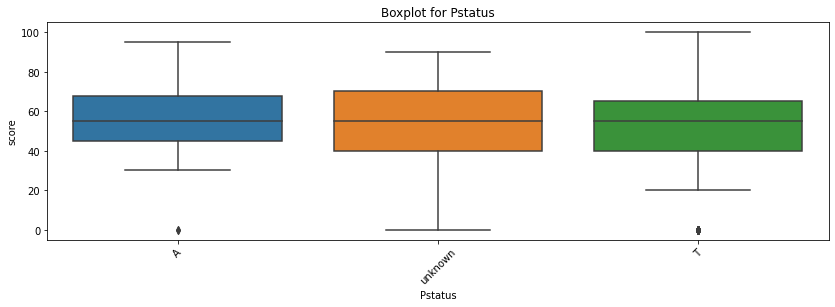

In [177]:
# возьмем первые три столбца
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_temp, #.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['address', 'famsize', 'Pstatus']:
    get_boxplot(col)

In [ ]:
# Address явно влияет на успеваемость. Остальные нет. Причем распределение для строчек спропусками в адресе
# похоже на распределение для учеников из города. Заполним пропуски в столбце address значение 'U' и дропнем столбцы famsize и Pstatus   

In [181]:
stud["address"] = stud["address"].where(pd.notnull(stud["address"]), 'U')

<AxesSubplot:xlabel='address', ylabel='score'>

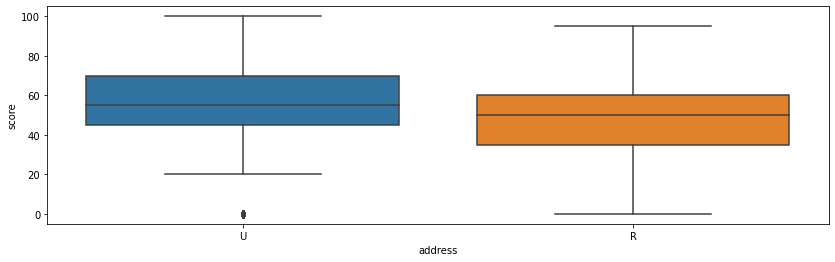

In [182]:
fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x='address', y='score', data=stud, ax=ax)

In [184]:
stud.drop(['famsize'], inplace = True, axis = 1)

In [185]:
stud.drop(['Pstatus'], inplace = True, axis = 1)

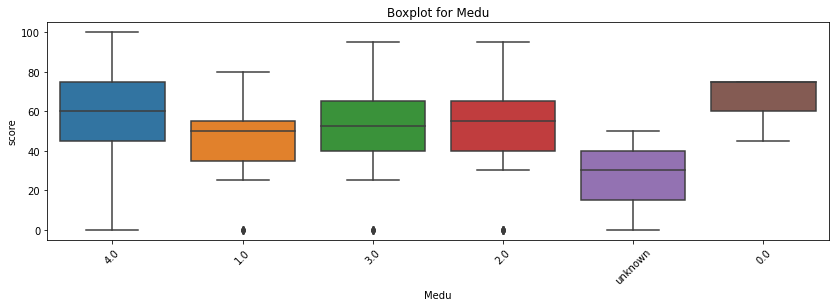

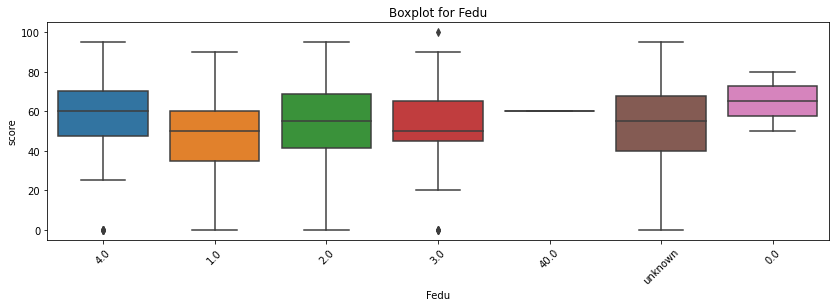

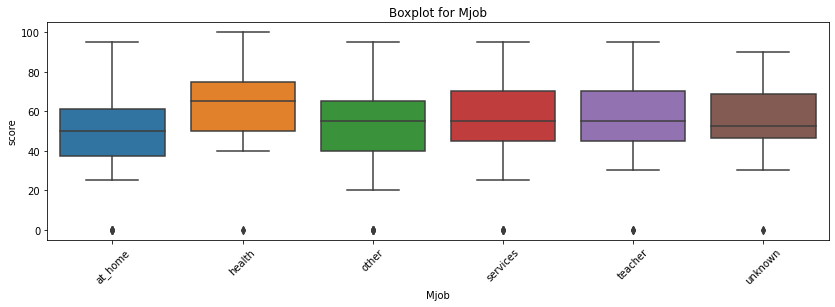

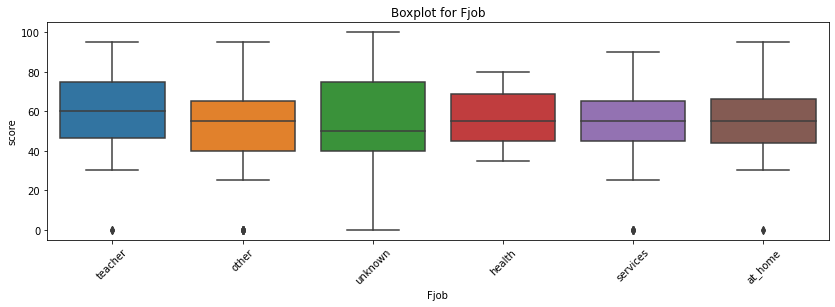

In [186]:
# возьмем следующие 4 столбца
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_temp, #.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['Medu', 'Fedu', 'Mjob', 'Fjob']:
    get_boxplot(col)

<AxesSubplot:>

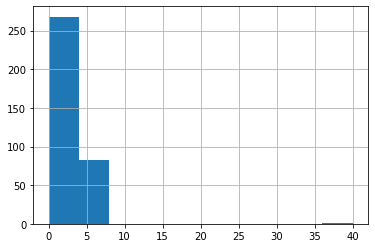

In [187]:
stud.Fedu.hist()

In [188]:
# явная ошибка - похоже, должно быть 4.0. Поправим на 4.0
stud.loc[stud.Fedu == 40, 'Fedu'] = 4.0

In [190]:
# зависимость есть. Причем для Medu сильно разнится в случае пропуска - сильно. 
# Но пропусков всего 3 и решение - выбросить строчки с пропусками в этом столбце  
# По остальным столбцам Fedu - ставим 2.0, Mjob - services, Fjob - services.

In [192]:
stud["Fedu"] = stud["Fedu"].where(pd.notnull(stud["Fedu"]), 2.0)

In [193]:
stud["Mjob"] = stud["Mjob"].where(pd.notnull(stud["Mjob"]), 'services')

In [196]:
stud['Fjob'] = stud['Fjob'].where(pd.notnull(stud['Fjob']), 'services')

In [199]:
stud = stud.dropna(subset=['Medu'], axis = 0)
stud.isna().sum()

school         0
sex            0
age            0
address        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason        17
guardian      30
traveltime    28
studytime      5
failures      22
schoolsup      9
famsup        37
paid          38
activities    14
nursery       15
higher        19
internet      32
romantic      30
famrel        27
freetime       9
goout          6
health        15
absences       0
score          0
dtype: int64

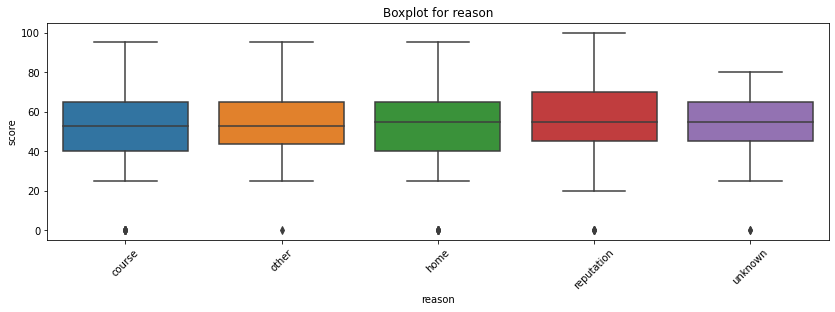

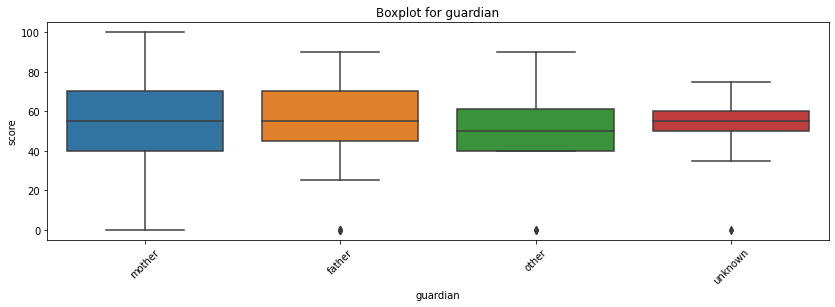

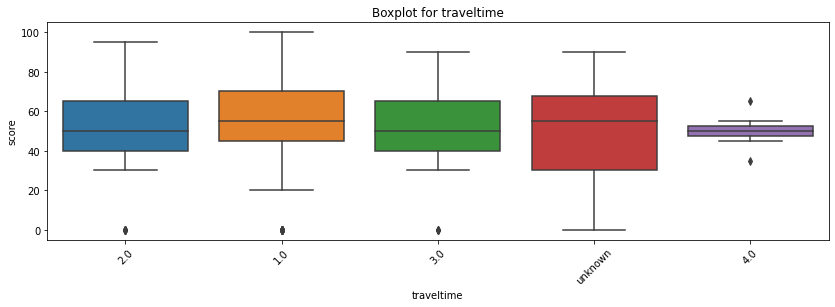

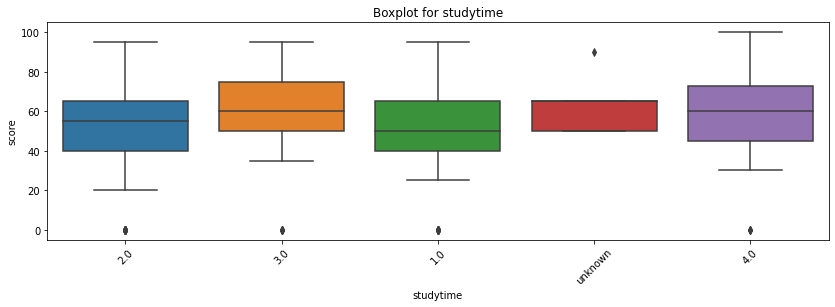

In [200]:
# возьмем следующие 4 столбца
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_temp, #.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['reason', 'guardian', 'traveltime', 'studytime']:
    get_boxplot(col)

In [213]:
# Studytime и reason может пригодиться. Заполним пропуски в них как 1.0 и other. Остальные дропнем 
#stud.drop(['famsize'], inplace = True, axis = 1)
stud['studytime'] = stud['studytime'].where(pd.notnull(stud['studytime']), 1.0)
stud['reason'] = stud['reason'].where(pd.notnull(stud['reason']), 'other')
stud.drop(['guardian'], inplace = True, axis = 1)
stud.drop(['traveltime'], inplace = True, axis = 1)

<ipython-input-213-6243a6d08f9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud['studytime'] = stud['studytime'].where(pd.notnull(stud['studytime']), 1.0)
<ipython-input-213-6243a6d08f9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud['reason'] = stud['reason'].where(pd.notnull(stud['reason']), 'other')
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

In [214]:
stud.isna().sum()

school         0
sex            0
age            0
address        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
studytime      0
failures      22
schoolsup      9
famsup        37
paid          38
activities    14
nursery       15
higher        19
internet      32
romantic      30
famrel        27
freetime       9
goout          6
health        15
absences       0
score          0
dtype: int64

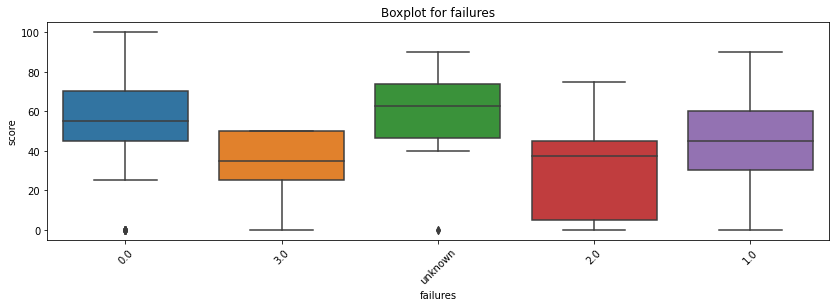

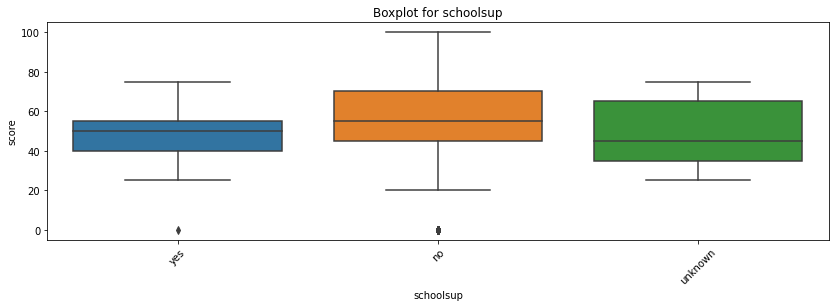

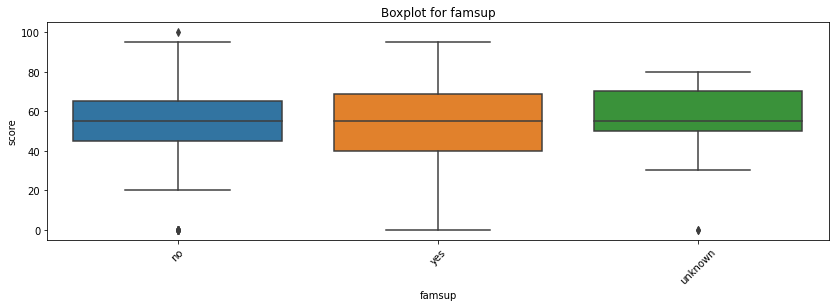

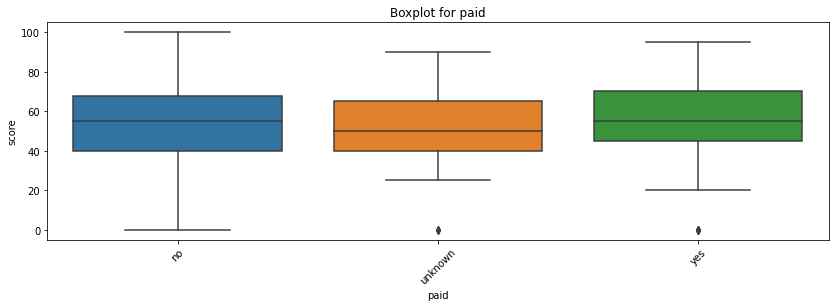

In [215]:
# возьмем следующие 4 столбца
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_temp, #.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['failures', 'schoolsup', 'famsup', 'paid']:
    get_boxplot(col)

In [216]:
# failures оставляем. Пропуски заполним как 0.0  
# schoolsup оставляем. Пропуски заполним как 'yes'
# famsup выбросим
# paid выбросим
stud['failures'] = stud['failures'].where(pd.notnull(stud['failures']), 0.0)
stud['schoolsup'] = stud['schoolsup'].where(pd.notnull(stud['schoolsup']), 'yes')
stud.drop(['famsup'], inplace = True, axis = 1)
stud.drop(['paid'], inplace = True, axis = 1)

<ipython-input-216-992a9cc18e14>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud['failures'] = stud['failures'].where(pd.notnull(stud['failures']), 0.0)
<ipython-input-216-992a9cc18e14>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud['schoolsup'] = stud['schoolsup'].where(pd.notnull(stud['schoolsup']), 'yes')
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

In [217]:
stud.isna().sum()

school         0
sex            0
age            0
address        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
studytime      0
failures       0
schoolsup      0
activities    14
nursery       15
higher        19
internet      32
romantic      30
famrel        27
freetime       9
goout          6
health        15
absences       0
score          0
dtype: int64

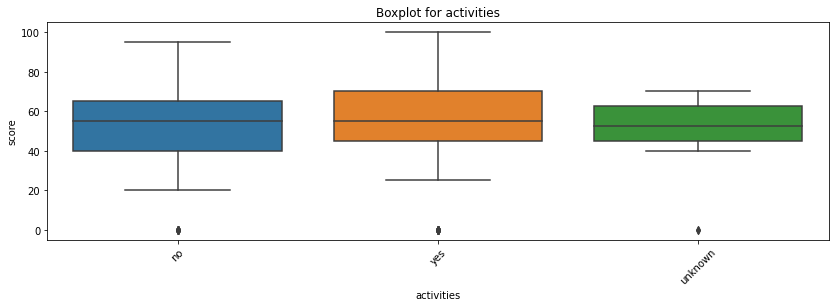

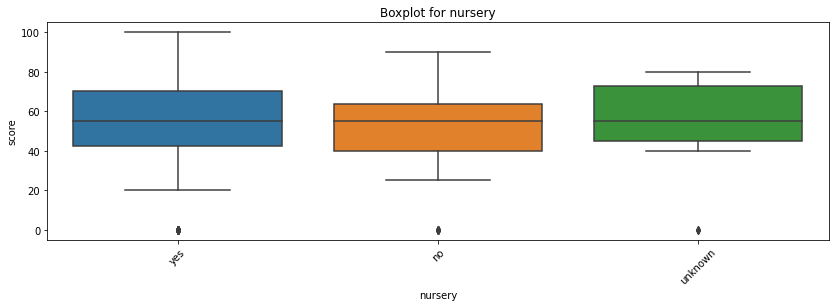

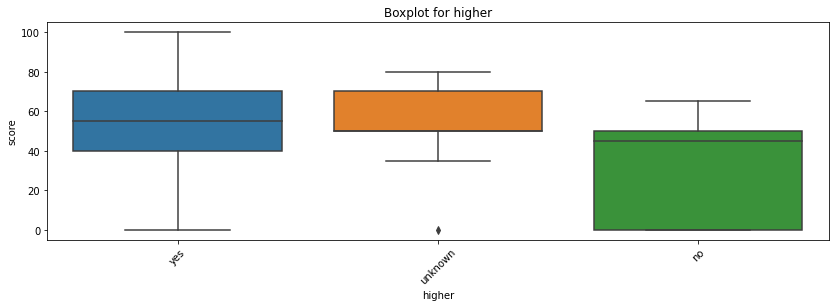

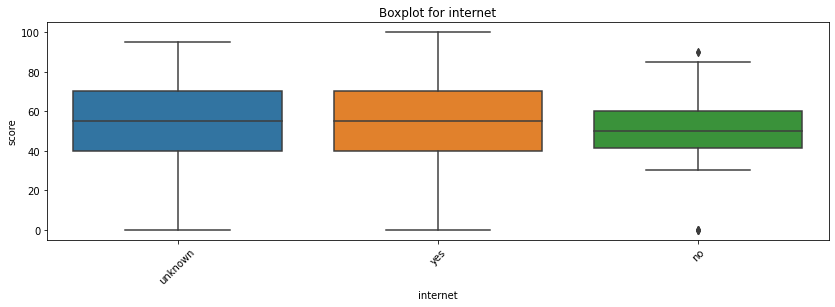

In [218]:
# возьмем следующие 4 столбца
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_temp, #.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['activities', 'nursery', 'higher', 'internet']:
    get_boxplot(col)

In [219]:
# higher оставляем. Пропуски заполним как 'yes'  
#  'activities', 'nursery', 'internet' выбросим
stud['higher'] = stud['higher'].where(pd.notnull(stud['higher']), 'yes')
stud.drop(['nursery'], inplace = True, axis = 1)
stud.drop(['activities'], inplace = True, axis = 1)
stud.drop(['internet'], inplace = True, axis = 1)

<ipython-input-219-9dc10f8988a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud['higher'] = stud['higher'].where(pd.notnull(stud['higher']), 'yes')
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


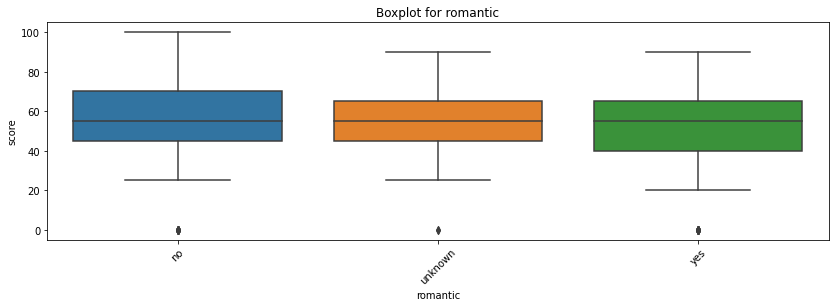

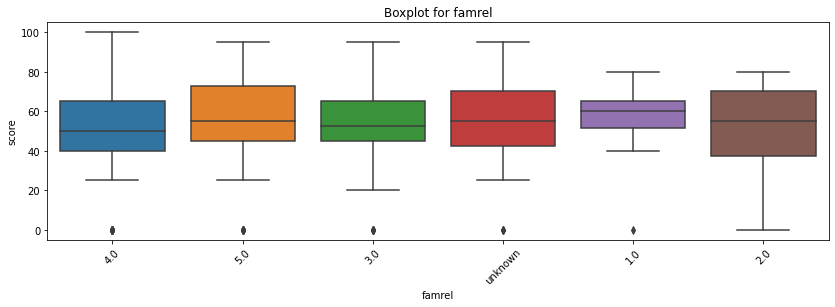

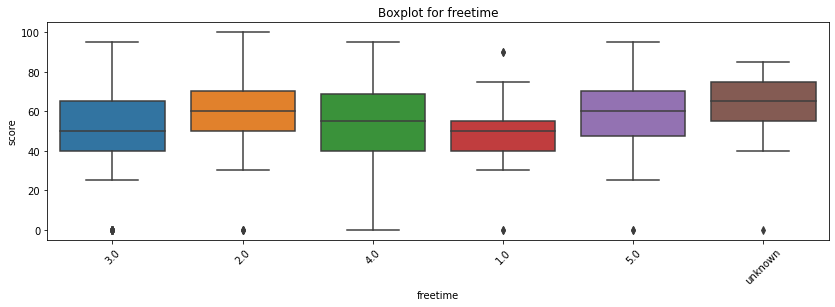

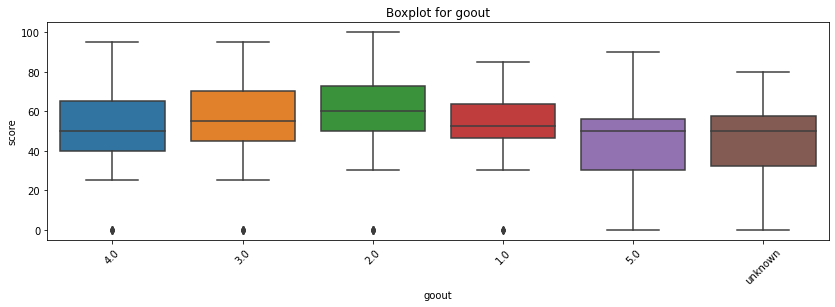

In [221]:
# возьмем следующие 4 столбца
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_temp, #.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['romantic', 'famrel', 'freetime', 'goout']:
    get_boxplot(col)

In [222]:
# 'freetime' и 'goout' оставляем. Пропуски заполним как '2.0' и '5.0'
#  'romantic' и 'famrel' выбросим
stud['freetime'] = stud['freetime'].where(pd.notnull(stud['freetime']), 2.0)
stud['goout'] = stud['goout'].where(pd.notnull(stud['goout']), 5.0)
stud.drop(['romantic'], inplace = True, axis = 1)
stud.drop(['famrel'], inplace = True, axis = 1)

In [223]:
stud.isna().sum()

school        0
sex           0
age           0
address       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
studytime     0
failures      0
schoolsup     0
higher        0
freetime      0
goout         0
health       15
absences      0
score         0
dtype: int64

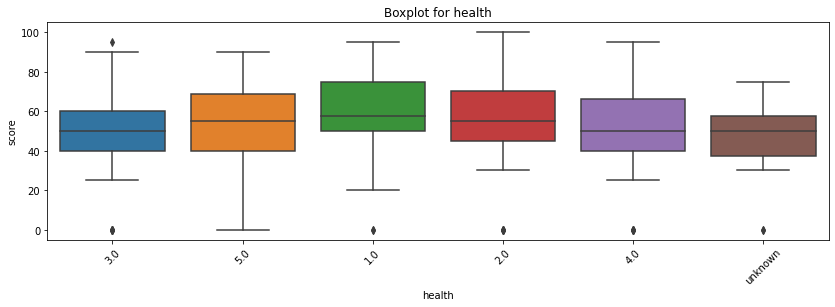

In [225]:
# возьмем последний столбец
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_temp, #.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['health']:
    get_boxplot(col)

In [226]:
# оставим и заполним пропуски как  3.0
stud['health'] = stud['health'].where(pd.notnull(stud['health']), 3.0)



In [227]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 394
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   school     373 non-null    object 
 1   sex        373 non-null    object 
 2   age        373 non-null    int64  
 3   address    373 non-null    object 
 4   Medu       373 non-null    float64
 5   Fedu       373 non-null    float64
 6   Mjob       373 non-null    object 
 7   Fjob       373 non-null    object 
 8   reason     373 non-null    object 
 9   studytime  373 non-null    float64
 10  failures   373 non-null    float64
 11  schoolsup  373 non-null    object 
 12  higher     373 non-null    object 
 13  freetime   373 non-null    float64
 14  goout      373 non-null    float64
 15  health     373 non-null    float64
 16  absences   373 non-null    float64
 17  score      373 non-null    float64
dtypes: float64(9), int64(1), object(8)
memory usage: 55.4+ KB


In [228]:
stud.isna().sum()

school       0
sex          0
age          0
address      0
Medu         0
Fedu         0
Mjob         0
Fjob         0
reason       0
studytime    0
failures     0
schoolsup    0
higher       0
freetime     0
goout        0
health       0
absences     0
score        0
dtype: int64

In [229]:
stud.head(10)

,school,sex,age,address,Medu,Fedu,Mjob,Fjob,reason,studytime,failures,schoolsup,higher,freetime,goout,health,absences,score
0,GP,F,18,U,4.0,4.0,at_home,teacher,course,2.0,0.0,yes,yes,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,1.0,1.0,at_home,other,course,2.0,0.0,no,yes,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,1.0,1.0,at_home,other,other,2.0,3.0,yes,yes,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,4.0,2.0,health,services,home,3.0,0.0,no,yes,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,3.0,3.0,other,other,home,2.0,0.0,no,yes,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,4.0,3.0,services,other,reputation,2.0,0.0,no,yes,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,U,2.0,2.0,other,other,home,2.0,0.0,no,yes,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,4.0,4.0,other,teacher,home,2.0,0.0,yes,yes,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,3.0,2.0,services,other,home,2.0,0.0,no,yes,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,3.0,4.0,other,other,home,2.0,0.0,no,yes,5.0,1.0,5.0,0.0,75.0


In [231]:
# и тест Стьюдента
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))

    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in ['school', 'sex', 'age', 'address', 'Mjob', 'Medu', 'Fedu', 'Fjob', 'schoolsup', 'failures',
            'reason', 'studytime','higher', 'freetime', 'goout', 'health','absences']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки absences


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeW

In [ ]:
# Выводы:
#
# Данных очень мало. Приходится сохранять по максимуму. Пропусков много. Только 97 строчек из 395 без пропусков.
# Выбросов и ошибок ввода не много. Есть разброс данных, связанный скорре всего с реальной статистикой.
# Наиболее важными для построения модели параметрами являются sex, address, Medu, Mjob, failures, 
# higher, goout, absences.
# Есть положительая корреляция между Fedu и Medu, в дальнейшем нужно обратить на это внимание. 
# 
# 
#
#
